In [1]:
import numpy as np
import matplotlib.pyplot as plt

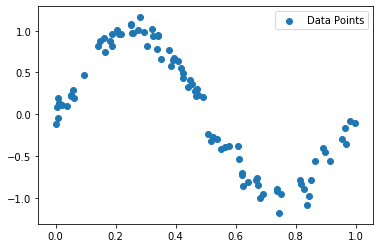

In [2]:
# Generating data for 1(a)
x = np.random.rand(100)
e = np.random.normal(0,0.1,100)
x_train = x[:90]
x_test = x[90:]
x_train = np.sort(x_train)
x_test = np.sort(x_test)
t_train = np.sin(2*np.pi*x_train) + e[:90]
t_test = np.sin(2*np.pi*x_test) + e[90:]
plt.scatter(x_train,t_train,label = 'Data Points')
plt.legend()
plt.show()

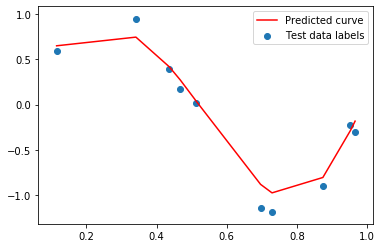

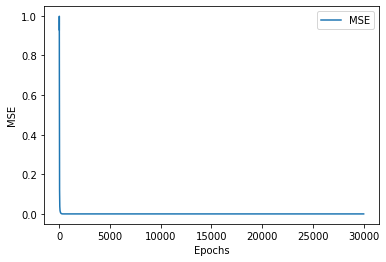

In [4]:
# Fitting using polynomial kernel
# Training
M = 10 # Degree of polynomial basis function
deg = M+1
phi1 = np.empty([x_train.shape[0],deg])
for i in range(0,phi1.shape[0]):
    for j in range(0,phi1.shape[1]):
        phi1[i,j] = x_train[i]**j*1.0
# w1 = np.matmul(np.linalg.inv(np.matmul(phi1.T,phi1)),np.matmul(phi1.T,t_train))
epochs = 30000
w1 = np.zeros(deg)
lr = 0.001 # learning rate
batch_size = 90
batch = int(x_train.shape[0]/batch_size)
# print(batch)
loss1 = []
for i in range(0,epochs):
    for b in range(0,batch):
        w1= w1 - lr*(-2*(np.matmul(phi1[b:b+batch_size].T,t_train[b:b+batch_size]-np.matmul(phi1[b:b+batch_size],w1))))
    l1 = (np.sum((t_train-np.matmul(phi1,w1)))**2)/t_train.shape[0]
#     print(i,l1)
    loss1.append(l1)
# Testing
y1 = np.zeros(t_test.shape)
for i in range(0,x_test.shape[0]):
    for j in range(0,w1.shape[0]):
        y1[i]+=w1[j]*x_test[i]**j
plt.plot(x_test,y1,label = 'Predicted curve', color = 'red')
plt.scatter(x_test, t_test, label = 'Test data labels')
plt.legend()
plt.show()
plt.plot(loss1,label = 'MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

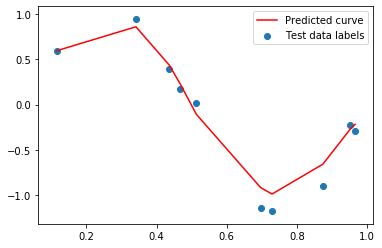

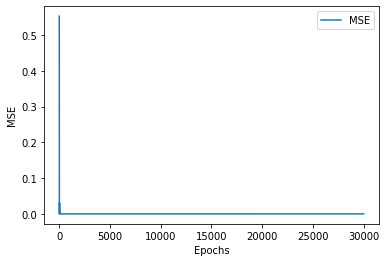

In [6]:
# Fitting using gaussian kernel
# Training
nos = 10 # Dimension of the kernel
mu1 = np.linspace(0,1,nos) # Array of means to be used in guassian kernel
sigma1 = 0.1 # Value of sigma in gaussian kernel
phi2 = np.empty([x_train.shape[0],nos])
for i in range(0,phi2.shape[0]):
    for j in range(0,phi2.shape[1]):
        phi2[i,j] = np.exp(-((x_train[i]-mu1[j])**2)/(2*sigma1**2))
# w2 = np.matmul(np.linalg.inv(np.matmul(phi2.T,phi2)),np.matmul(phi2.T,t_train))
epochs = 30000
w2 = np.zeros(nos)
lr = 0.001 # learning rate
batch_size = 90
batch = int(x_train.shape[0]/batch_size)
# print(batch)
loss2 = []
for i in range(0,epochs):
    for b in range(0,batch):
        w2= w2 - lr*(-2*(np.matmul(phi2[b:b+batch_size].T,t_train[b:b+batch_size]-np.matmul(phi2[b:b+batch_size],w2))))
    l1 = (np.sum((t_train-np.matmul(phi2,w2)))**2)/t_train.shape[0]
#     print(i,l1)
    loss2.append(l1)
# Testing
y2 = np.zeros(t_test.shape)
for i in range(0,x_test.shape[0]):
    for j in range(0,w2.shape[0]):
        y2[i]+=w2[j]*np.exp(-((x_test[i]-mu1[j])**2)/(2*sigma1**2))
plt.plot(x_test,y2,label = 'Predicted curve', color = 'red')
plt.scatter(x_test, t_test, label = 'Test data labels')
plt.legend()
plt.show()
plt.plot(loss2,label = 'MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

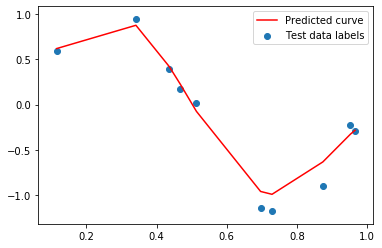

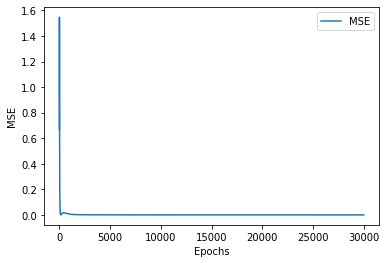

In [7]:
# Fitting using sigmoidal kernel
def sigmoid(x):
    return 1.0/(1+np.exp(x))
# Training
nos = 10 # Dimension of the kernel
mu2 = np.linspace(0,1,nos) # Array of means to be used in sigmoidal kernel
sigma2 = 0.1 # Value of sigma in gaussian kernel
phi3 = np.empty([x_train.shape[0],nos])
for i in range(0,phi2.shape[0]):
    for j in range(0,phi3.shape[1]):
        phi3[i,j] = sigmoid((x_train[i]-mu2[j])/sigma2)
# w3 = np.matmul(np.linalg.inv(np.matmul(phi3.T,phi3)),np.matmul(phi3.T,t_train))
epochs = 30000
w3 = np.zeros(nos)
lr = 0.001 # learning rate
batch_size = 90
batch = int(x_train.shape[0]/batch_size)
# print(batch)
loss3 = []
for i in range(0,epochs):
    for b in range(0,batch):
        w3= w3 - lr*(-2*(np.matmul(phi3[b:b+batch_size].T,t_train[b:b+batch_size]-np.matmul(phi3[b:b+batch_size],w3))))
    l1 = (np.sum((t_train-np.matmul(phi3,w3)))**2)/t_train.shape[0]
#     print(i,l1)
    loss3.append(l1)
# Testing
y3 = np.zeros(t_test.shape)
for i in range(0,x_test.shape[0]):
    for j in range(0,w3.shape[0]):
        y3[i]+=w3[j]*sigmoid((x_test[i]-mu2[j])/sigma2)
plt.plot(x_test,y3,label = 'Predicted curve', color = 'red')
plt.scatter(x_test, t_test, label = 'Test data labels')
plt.legend()
plt.show()
plt.plot(loss3,label = 'MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()